<a href="https://colab.research.google.com/github/kingjiwoo/practice_making_chatbot/blob/main/chatbot_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

챗봇 만들기

데이터 분석

In [6]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 43.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/data_in/ChatbotData.csv', encoding='utf-8')

print(data.head())

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


In [4]:
sentences = list(data['Q']) + list(data['A'])

In [7]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(" ", "")) for s in sentences]

from konlpy.tag import Okt

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

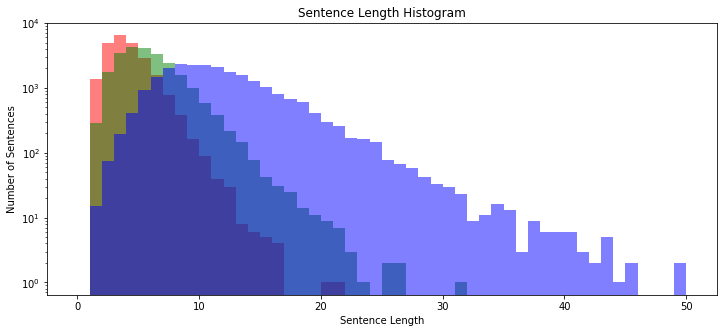

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token,bins=50, range=[0,50], alpha=0.5,color='r', label='eojeol')
plt.hist(sent_len_by_morph,bins=50, range=[0,50], alpha=0.5,color='g', label='morph')
plt.hist(sent_len_by_eumjeol,bins=50, range=[0,50], alpha=0.5,color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f6ab2b190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f6ab2b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f6aac5df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0f6ab2bf10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f6a61e5b0>,
 'means': [<matplotlib.lines.Line2D at 0x7f0f6a61e250>,
  <matplotlib.lines.Line2D at 0x7f0f6a636940>]}

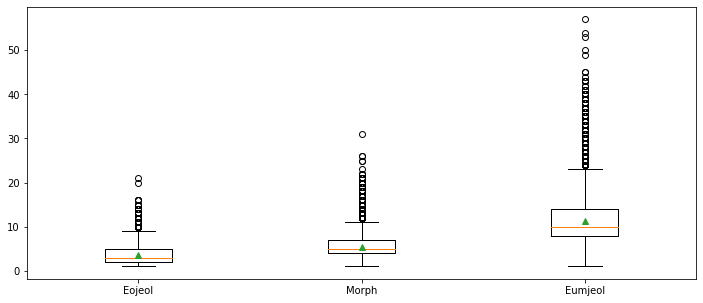

In [9]:
#이건 그냥 일단 임포트 
import numpy as np

#박스플롯을 통한 분석 결과 확인
plt.figure(figsize=(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'],
            showmeans=True)

Text(0, 0.5, 'Number')

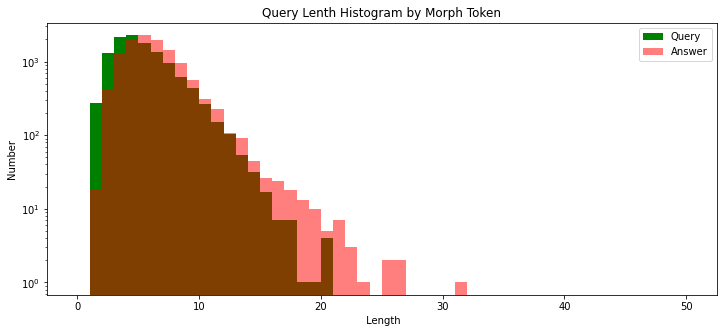

In [10]:
#질문 답변을 가각 나눠 문장 길이 분석 => 여기서는 형태소만 
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

plt.figure(figsize=(12,5))
plt.hist(query_sent_len_by_morph,bins=50, range=[0,50],color='g', label='Query')
plt.hist(answer_sent_len_by_morph,bins=50, range=[0,50], alpha=0.5,color='r', label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Lenth Histogram by Morph Token')
plt.xlabel(' Length')
plt.ylabel('Number')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f69812430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f69812af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f69812160>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0f698191f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f698194f0>,
 'means': []}

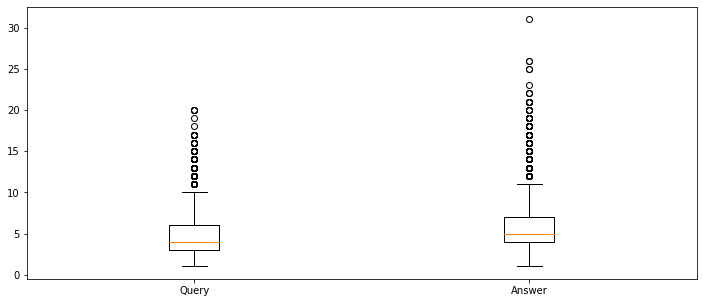

In [11]:
plt.figure(figsize=(12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
                                  labels=['Query', 'Answer'])

In [12]:
#데이터 어휘 품사  분석
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [13]:
#데이터 어휘 빈도 분석
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Verb' or tag  == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjactive':
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

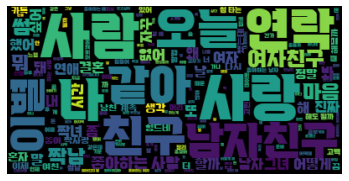

In [14]:
from wordcloud import WordCloud
#질문 어휘 분석
query_wordcloud = WordCloud(font_path='/content/drive/MyDrive/kotext/VITRO CORE TTF.ttf').generate(query_NVA_token_sentences)
plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

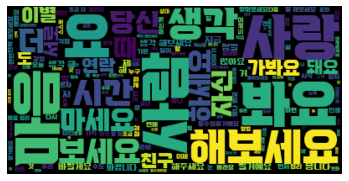

In [15]:
#대답 어휘 분석
answer_wordcloud = WordCloud(font_path='/content/drive/MyDrive/kotext/VITRO CORE TTF.ttf').generate(answer_NVA_token_sentences)
plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()